### **Importing libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

In [2]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [3]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df['state'] = df['state'].apply(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17323 entries, 0 to 17322
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         17323 non-null  datetime64[ns]
 1   state                        17323 non-null  object        
 2   positive                     17169 non-null  float64       
 3   probableCases                7287 non-null   float64       
 4   negative                     17017 non-null  float64       
 5   pending                      1834 non-null   float64       
 6   totalTestResultsSource       17323 non-null  object        
 7   totalTestResults             17254 non-null  float64       
 8   hospitalizedCurrently        14106 non-null  float64       
 9   hospitalizedCumulative       10574 non-null  float64       
 10  inIcuCurrently               8973 non-null   float64       
 11  inIcuCumulative              3060 non-nul

In [7]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-01-05,AK,47006.0,NaN,1255853.0,NaN,totalTestsViral,1302859.0,93.0,1056.0,NaN,NaN,6.0,NaN,7165.0,A,1/5/2021 03:59,2021-01-05T03:59:00Z,01/04 22:59,218.0,1056.0,2021-01-05T03:59:00Z,1302859.0,56193.0,1245250.0,NaN,218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,194,5167,1302859,5361,1302859,0,23,d12726eb32f967aa370925e4ec95bebabe3b07a0,0,0,0,0,0,NaN
1,2021-01-05,AL,379593.0,74503.0,1605791.0,NaN,totalTestsPeopleViral,1910881.0,3080.0,35430.0,NaN,2445.0,NaN,1400.0,202137.0,A,1/5/2021 11:00,2021-01-05T11:00:00Z,01/05 06:00,4886.0,35430.0,2021-01-05T11:00:00Z,NaN,NaN,NaN,305090.0,4266.0,620.0,NaN,1910881.0,NaN,NaN,NaN,89088.0,NaN,NaN,NaN,NaN,NaN,NaN,1,5498,3889,1985384,7493,1985384,8,0,a4321a0590c59e924d2aaefc9fdb48de3dbc7822,0,0,0,0,0,NaN
2,2021-01-05,AR,238888.0,42958.0,1908393.0,NaN,totalTestsViral,2104323.0,1323.0,11743.0,426.0,NaN,224.0,1256.0,210617.0,A+,1/5/2021 00:00,2021-01-05T00:00:00Z,01/04 19:00,3836.0,11743.0,2021-01-05T00:00:00Z,2104323.0,NaN,1908393.0,195930.0,3205.0,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261928.0,50949.0,21856.0,3300.0,5,4107,6427,2147281,8702,2147281,36,229,ffc1b0d3bf31e09303f57be99d2814c8f34fb6cf,0,0,0,0,0,NaN
3,2021-01-05,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,0,0,6fbae5d9894b29faae54e071b0884b594f8738e2,0,0,0,0,0,NaN
4,2021-01-05,AZ,567474.0,28755.0,2415013.0,NaN,totalTestsViral,5324030.0,4789.0,40303.0,1096.0,NaN,761.0,NaN,80302.0,A+,1/5/2021 00:00,2021-01-05T00:00:00Z,01/04 19:00,9317.0,40303.0,2021-01-05T00:00:00Z,5324030.0,NaN,NaN,538719.0,8398.0,919.0,NaN,2953732.0,393396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5932,10699,2982487,35372,2982487,253,406,d9299956304255d01cca5c425249c05d86ba33bc,0,0,0,0,0,NaN


In [8]:
df.fillna(value=-1,inplace=True)

In [9]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-01-05,AK,47006.0,-1.0,1255853.0,-1.0,totalTestsViral,1302859.0,93.0,1056.0,-1.0,-1.0,6.0,-1.0,7165.0,A,1/5/2021 03:59,2021-01-05T03:59:00Z,01/04 22:59,218.0,1056.0,2021-01-05T03:59:00Z,1302859.0,56193.0,1245250.0,-1.0,218.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,194,5167,1302859,5361,1302859,0,23,d12726eb32f967aa370925e4ec95bebabe3b07a0,0,0,0,0,0,-1.0
1,2021-01-05,AL,379593.0,74503.0,1605791.0,-1.0,totalTestsPeopleViral,1910881.0,3080.0,35430.0,-1.0,2445.0,-1.0,1400.0,202137.0,A,1/5/2021 11:00,2021-01-05T11:00:00Z,01/05 06:00,4886.0,35430.0,2021-01-05T11:00:00Z,-1.0,-1.0,-1.0,305090.0,4266.0,620.0,-1.0,1910881.0,-1.0,-1.0,-1.0,89088.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,5498,3889,1985384,7493,1985384,8,0,a4321a0590c59e924d2aaefc9fdb48de3dbc7822,0,0,0,0,0,-1.0
2,2021-01-05,AR,238888.0,42958.0,1908393.0,-1.0,totalTestsViral,2104323.0,1323.0,11743.0,426.0,-1.0,224.0,1256.0,210617.0,A+,1/5/2021 00:00,2021-01-05T00:00:00Z,01/04 19:00,3836.0,11743.0,2021-01-05T00:00:00Z,2104323.0,-1.0,1908393.0,195930.0,3205.0,631.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,261928.0,50949.0,21856.0,3300.0,5,4107,6427,2147281,8702,2147281,36,229,ffc1b0d3bf31e09303f57be99d2814c8f34fb6cf,0,0,0,0,0,-1.0
3,2021-01-05,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,-1.0,2020-12-01T00:00:00Z,2140.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60,0,0,2140,0,2140,0,0,6fbae5d9894b29faae54e071b0884b594f8738e2,0,0,0,0,0,-1.0
4,2021-01-05,AZ,567474.0,28755.0,2415013.0,-1.0,totalTestsViral,5324030.0,4789.0,40303.0,1096.0,-1.0,761.0,-1.0,80302.0,A+,1/5/2021 00:00,2021-01-05T00:00:00Z,01/04 19:00,9317.0,40303.0,2021-01-05T00:00:00Z,5324030.0,-1.0,-1.0,538719.0,8398.0,919.0,-1.0,2953732.0,393396.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,5932,10699,2982487,35372,2982487,253,406,d9299956304255d01cca5c425249c05d86ba33bc,0,0,0,0,0,-1.0


### **Bar Chart of the given variable**

In [10]:
def plot_var(var='positiveIncrease', state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='lightblue')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

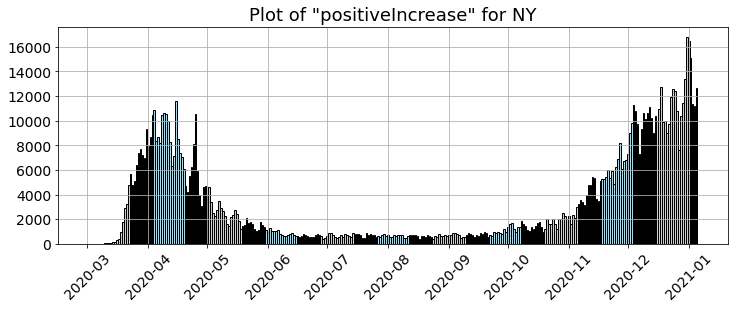

In [11]:
plot_var()

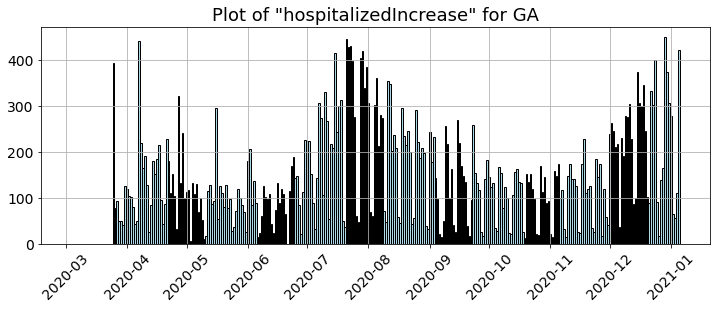

In [12]:
plot_var('hospitalizedIncrease','GA')

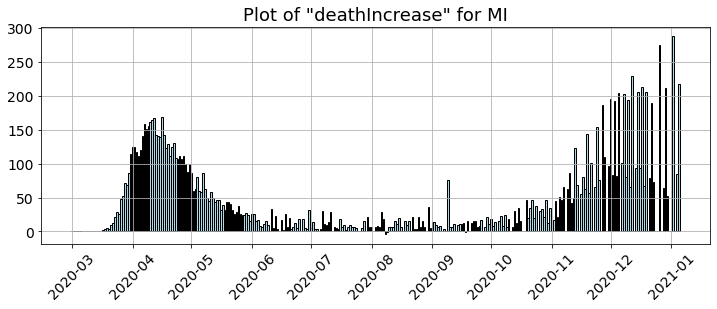

In [13]:

plot_var('deathIncrease','MI')

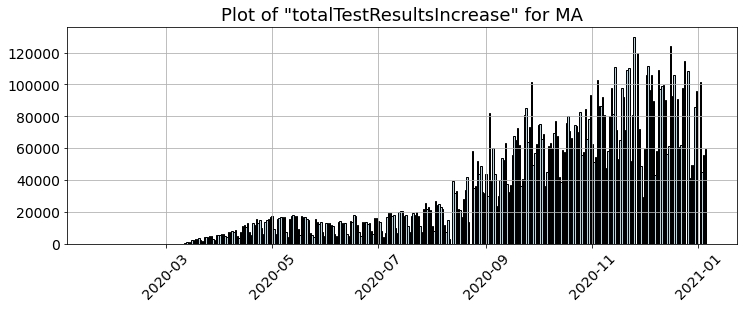

In [14]:
plot_var('totalTestResultsIncrease','MA')

### **Scatter Plot of two variables**

In [15]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='green',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

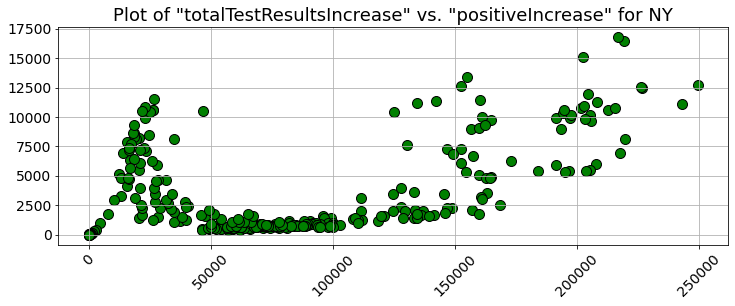

In [16]:
plot_xy(state='NY')

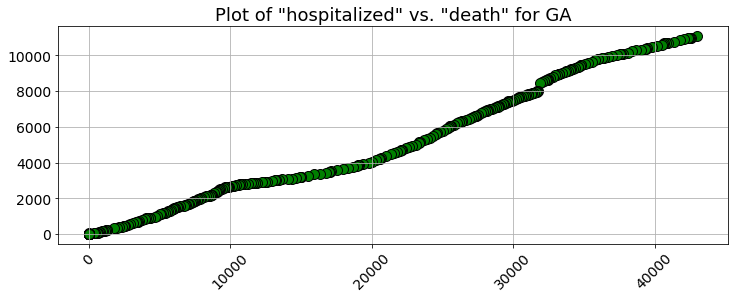

In [17]:
plot_xy('hospitalized','death','GA')

## Testing function

In [18]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

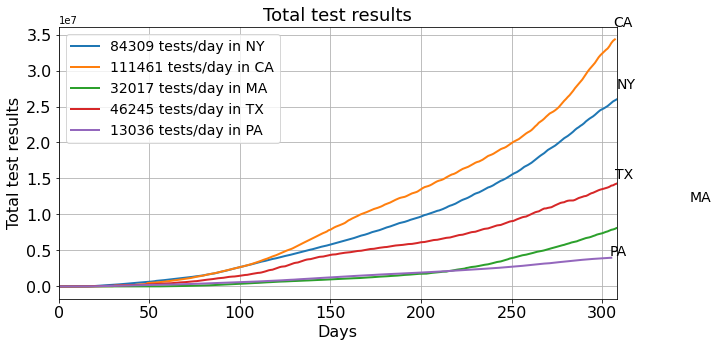

In [19]:
plotTesting()

### **Computing fatality ratio**

In [20]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

### **Computing hospitalization ratio**

In [21]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

### **Computing positive cases test ratio**

In [22]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

### **Computing recovery ratio**

In [23]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

### **Fatality ratio chart**

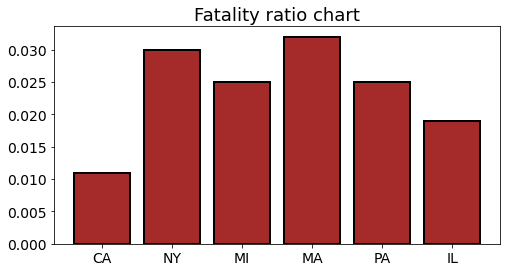

In [24]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='brown',
        edgecolor='k',linewidth=2)
plt.show()

## **Hospitalization Chart**

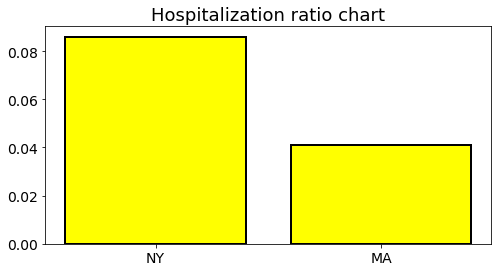

In [25]:

states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='yellow',
        edgecolor='k',linewidth=2)
plt.show()

## Positive test ratio chart

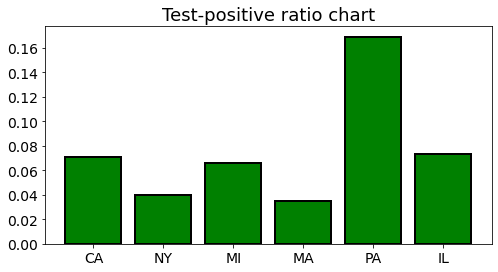

In [26]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='green',
        edgecolor='k',linewidth=2)
plt.show()

## **Bubble Chart**

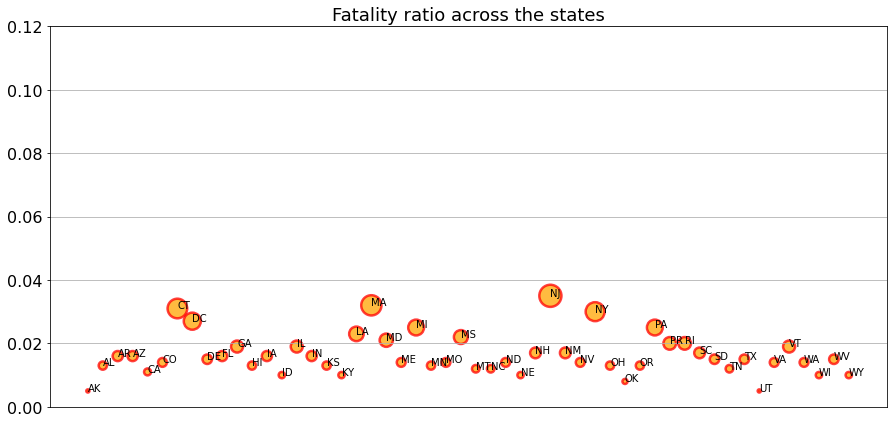

In [27]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

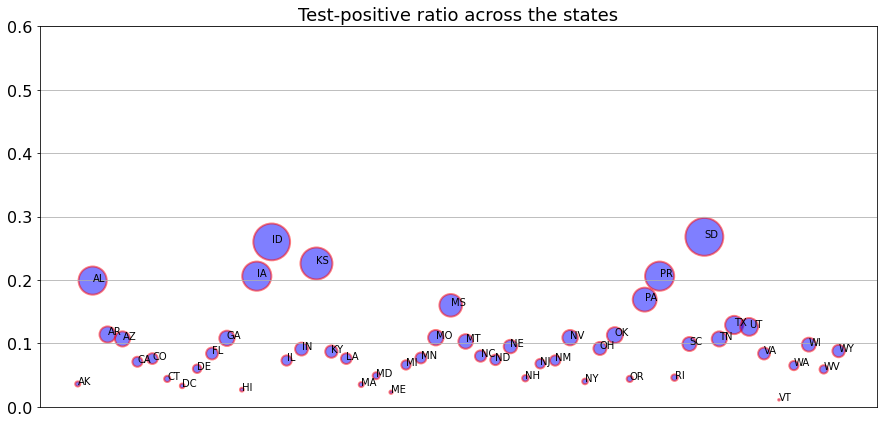

In [28]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()